<div class="alert alert-block alert-success"> 
<h1>Домашнее задание 3.1</h1>
</div>

Ты все еще в команде популярной сети фитнес-клубов. Мы ищем точки роста на следующий год и хотим исследовать две темы: 

1. **Тренировки**: как они распределяются во времени и по тренерам, как обстоят дела в разных клубах.
2. **Клиентов**: как их можно сегментировать, какие у них привычки.

В следующих 6 заданиях ты построишь графики — они помогут сформулировать новые гипотезы для роста нашей сети фитнес-клубов в следующем году.

В заданиях ставляй свои комментарии о том, какие закономерности видишь на графиках. 

Для начала подключись ко всем нужным библиотекам и данным. Проверь, что данные лежат в той же папке, что этот ноутбук.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# загружаю данные

workouts = pd.read_csv('workouts.csv', parse_dates=['start_at'])
users = pd.read_excel('users.xlsx')

# сразу создаю новый датафрейм, в котором соединены уроки и пользователи

workouts_users =  pd.merge(workouts, users, 
                     how='left',
                     left_on='client_id', right_on='user_id')

---

## Задание 1

**Построй линейный график, который показывает количество тренировок за каждый день. 
Оставь комментарий — какие закономерности ты наблюдаешь?**

Как это сделать?

1. Работать будем с датафреймом `workouts`.
2. Сгруппируй данные по каждому дню в году (именно дню, а не числу, например 1 января и 1 февраля – это разные дни). Для этого идеально подойдет метод `resemple()`, если не помнишь, как он работает, смело смотри в шпаргалке. После найди количество проведенных тренировок в каждый день и запиши их в переменную `trainings_by_day`.
3. Построй линейный график. Можешь добавить любые агрументы, но обязательно используй вот эти: 
    - размер графика
    - название графика 
    - подпись оси `X` 
    
    - подпись оси `Y` 
4. Удали неполные данные, которые мешают анализу.

In [3]:
workouts.head(2) # смотрю датасет

,workout_id,cost,start_at,status,workout_schedule_type,client_id,client_status,workout_type,trainer_department,trainer_id
0,30793909,NaN,2020-11-13 12:45:00,success,trial,22034,NaN,general,Sales,10722051
1,31123309,750.0,2020-11-21 13:00:00,success,regular,22034,new,general,Spartacus,940642


In [4]:
# Записываю новый датасет с количеством тренировок по дням года

trainings_by_day = workouts.resample('D', on='start_at')['workout_id'].count()

In [5]:
# Удаляю последний элемент, как нерелевантный (он равен 3)

trainings_by_day.iloc[:-1]

start_at
2020-01-01      1
2020-01-02      4
2020-01-03      5
2020-01-04      5
2020-01-05      9
             ... 
2020-12-03    486
2020-12-04    365
2020-12-05    292
2020-12-06    250
2020-12-07    451
Freq: D, Name: workout_id, Length: 342, dtype: int64

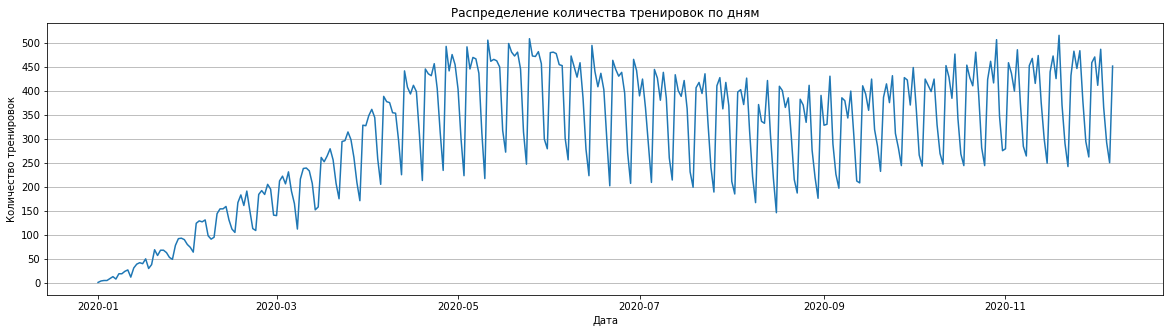

In [6]:
# Строю линейный график  - Line chart

plt.figure(figsize = (20, 5)) # размерность
plt.title('Распределение количества тренировок по дням') 
plt.xlabel('Дата') 
plt.ylabel('Количество тренировок') 
plt.grid(axis = 'y') # сетка только горизонтальная
plt.yticks(ticks =np.arange(0, 600, 50)) # задаю отметки на оси Y, использую 

# Передаю в функцию 1 аргумент, поэтому по оси X - будет индекс - это дата

plt.plot(trainings_by_day.iloc[:-1]) # количество тренировок в каждый день
plt.show()

<div class="alert alert-block alert-success">
    
Не понятно по каким признакам происходят мелкие колебания - предположительно, по дням недели.    
Проверю - для этого построю график, показывающий выходные и рабочие дни
</div>

In [7]:
# Функция, которая находит выходные и рабочие дни

def get_dayofweek(date):
    day_week = date.weekday() # вытащим день недели из даты 
    
    if day_week in (0, 1, 2, 3, 4): 
        return 'Рабочий'
    else:
        return 'Выходной'

In [8]:
# Проверяю как работает функция

print('Дата', trainings_by_day.index[0]) # беру первую дату из нашей таблицы
print('День', get_dayofweek(trainings_by_day.index[0])) # вывожу результат работы функции

Дата 2020-01-01 00:00:00
День Рабочий


In [9]:
# Создаю новый датафрейм и сбросываю индекс, чтобы дата стала отдельной колонкой

trainings_by_dayofweek = trainings_by_day.reset_index().iloc[:-1] # беру строки кроме последней

In [10]:
# Применяю функцию к дате и записываю в новую колонку 'day_of_week'

trainings_by_dayofweek['day_of_week'] = trainings_by_dayofweek['start_at'].apply(get_dayofweek)

In [11]:
trainings_by_dayofweek.head(8) # смотрю, что получилось

,start_at,workout_id,day_of_week
0,2020-01-01,1,Рабочий
1,2020-01-02,4,Рабочий
2,2020-01-03,5,Рабочий
3,2020-01-04,5,Выходной
4,2020-01-05,9,Выходной
5,2020-01-06,13,Рабочий
6,2020-01-07,8,Рабочий
7,2020-01-08,19,Рабочий


Задаю цвет в виде словаря, где ключ — день недели, а значение — кодовая буква цвета.

<img style='float:left' src=https://res.cloudinary.com/djcwxgbfz/image/upload/v1608375631/skills/color.jpg width="800" >

In [12]:
colors_dayofweek = {'Рабочий':'y',
                  'Выходной':'r'} # задаю цвета

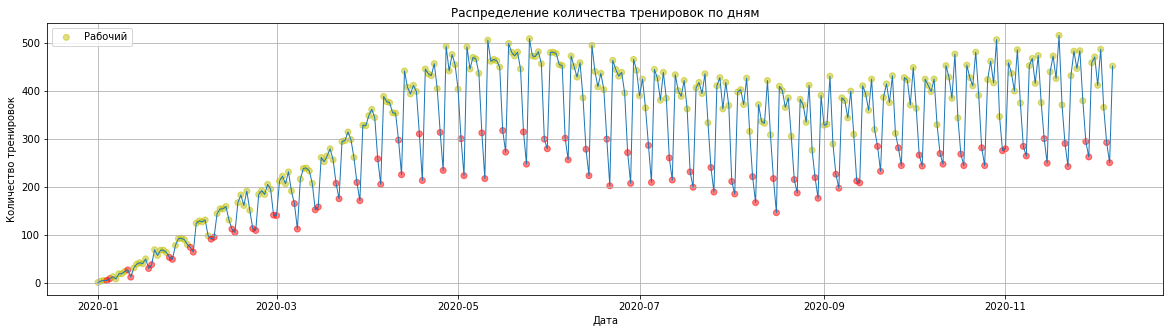

In [13]:
# Строю цветную точечную диаграмму - Scatter plot, в которой цвет точки зависит от дня недели, одновременно с Line Chart

plt.figure(figsize=(20, 5))  
plt.title('Распределение количества тренировок по дням') 
plt.xlabel('Дата') 
plt.ylabel('Количество тренировок') 
plt.grid() 

# передаю в функцию 2 аргумента, по оси X - дата, а по оси Y - количество тренировок 
plt.plot(trainings_by_dayofweek['start_at'],
         trainings_by_dayofweek['workout_id'],
         linewidth=1) #linewidth - это толщина линии 

# использую заданные цвета для отрисовки точек на графике
plt.scatter(
    trainings_by_dayofweek.start_at, # ось OX 
    trainings_by_dayofweek.workout_id, # ось OY
    c = trainings_by_dayofweek['day_of_week'].map(colors_dayofweek), # задаю цвета точек
    alpha = 0.5, # прозрачность 50%
    label = 'Рабочий'
)

plt.legend(loc=2) # вывожу легенду слева вверху
plt.show()

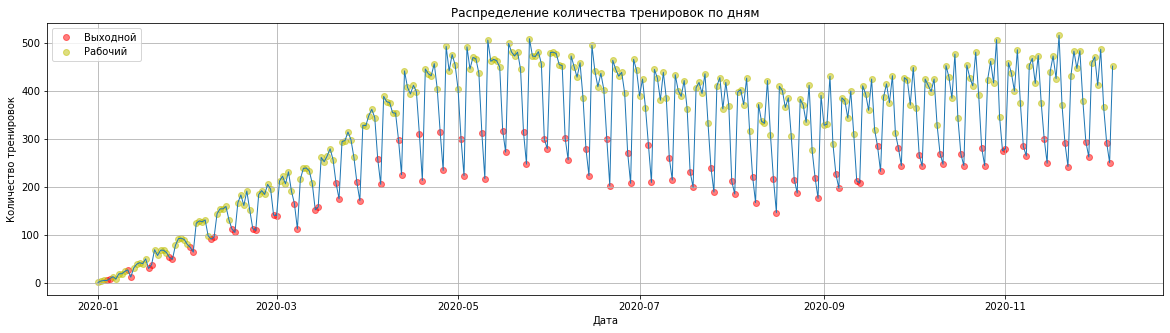

In [14]:
# Или 2 вариант, с возможностью вывести легенду с несколькими значениями

plt.figure(figsize=(20, 5))  
plt.title('Распределение количества тренировок по дням') 
plt.xlabel('Дата') 
plt.ylabel('Количество тренировок') 
plt.grid() 

# создаю датафрейм только с выходными днями
weekend_workouts = trainings_by_dayofweek.loc[trainings_by_dayofweek['day_of_week'] == 'Выходной']

# датафрейм только с рабочими днями
workday_workouts  = trainings_by_dayofweek.loc[trainings_by_dayofweek['day_of_week'] == 'Рабочий']


# передаю в функцию 2 аргумента, по оси X - дата, а по оси Y - количество тренировок 
plt.plot(trainings_by_dayofweek['start_at'],
         trainings_by_dayofweek['workout_id'],
         linewidth=1) #linewidth - это толщина линии 

# строю точечную диаграмму для Выходных дней
plt.scatter(
    weekend_workouts.start_at, # ось OX 
    weekend_workouts.workout_id, # ось OY
    color = 'r',
    alpha = 0.5, # прозрачность 50%
    label = 'Выходной')

# строю точечную диаграмму для Рабочих дней
plt.scatter(
    workday_workouts.start_at, # ось OX 
    workday_workouts.workout_id, # ось OY
    color = 'y',
    alpha = 0.5, # прозрачность 50%
    label = 'Рабочий')

plt.legend() # вывожу легенду, место определяется автоматически
plt.show()



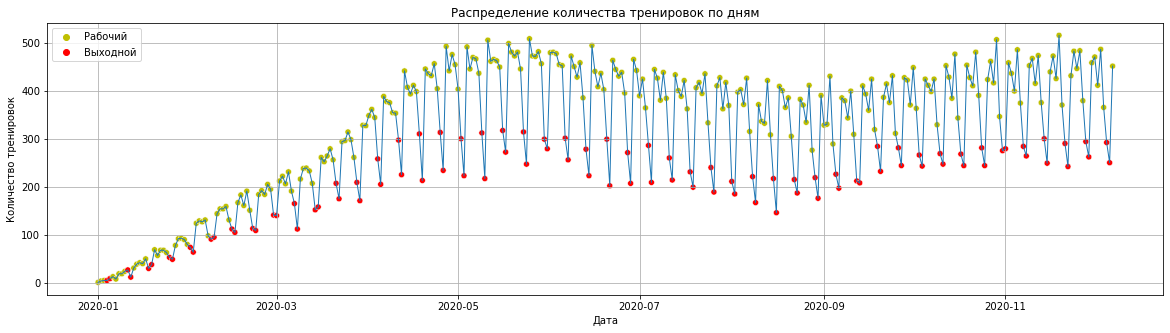

In [15]:
# Вариант 3, предложенный наставником, самый кайфовый

# начало, как в 1 варианте
plt.figure(figsize=(20, 5))  
plt.title('Распределение количества тренировок по дням') 
plt.xlabel('Дата') 
plt.ylabel('Количество тренировок') 
plt.grid() 

# передаю в функцию 2 аргумента, по оси X - дата, а по оси Y - количество тренировок 
plt.plot(trainings_by_dayofweek['start_at'],
         trainings_by_dayofweek['workout_id'],
         linewidth=1) #linewidth - это толщина линии 

sns.scatterplot(x=trainings_by_dayofweek.start_at,
                y=trainings_by_dayofweek.workout_id,
                hue=trainings_by_dayofweek['day_of_week'],
                palette=colors_dayofweek
               )

plt.legend(loc=2) # вывожу легенду слева вверху
plt.show()

<div class = "alert alert-block alert-warning">
    
<b>Вывод:</b>  
    
Видно явное нежелание клиентов нагружать себя в выходные дни и значительно большее кол-во тренировок в рабочие дни, снижающееся к пятнице.  
Сезонная тенденция - нарастание от января к лету, малый спад к августу, с последующим повышением
</div>

---

## Задание 2

В ноябре постоянные тренеры жаловались на перегрузку. При этом в одних департаментах часто не хватало тренеров, а в других люди сидели без работы. Поэтому по каждому департаменту нам важно узнать, какую нагрузку имеют тренера (в количестве тренировок) и сколько тренеров имеют ту или иную нагрузку. 

**Построй гистограмму распределения, которая покажет, сколько тренеров провели n число тренировок в ноябре. При подсчете постоянных тренеров рассматриваем только тех, которые уже работали в нашей компании до 1 ноября. Сделай отдельный график по каждому департаменту (всего их 7).**

Как это сделать:

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - отобрали тренеров, которые уже проводили тренировки до начала ноября
    - взяли тренировки, которые прошли в ноябре
    - выбрали из них те, которые провели ранее отобранные тренеры
    

2. В цикле для каждого департамента: 

    - отфильтруй по `trainer_department` тренировки нужного департамента
    - построй гистограмму распределения количества тренеров по количеству проведенных тренировок. Можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
        - задай 5 столбцов
      


In [16]:
# выбрали тренеров, которые вели тренировки до 1 ноября
trainers_select = workouts['trainer_id'].loc[workouts['start_at'] < '2020-11-01'] 

# множеством взяли уникальные значения
trainers_select = set(trainers_select) 

In [17]:
# возьму тренировки только за ноябрь
november_workouts = workouts.loc[workouts['start_at'].dt.month == 11] 

# возьму только активных тренеров
november_workouts = november_workouts.loc[november_workouts['trainer_id'].isin(trainers_select)] 

In [18]:
# кол-во тренировок у каждого тренера
workouts_by_trainer = november_workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# перевожу series в dataframe, сбрасываю индекс
workouts_by_trainer = workouts_by_trainer.reset_index() 

# переименовываю столбец workout_id, ведь в нем теперь количество тренировок
workouts_by_trainer.columns = ['trainer_id','trainer_department','workouts'] 

workouts_by_trainer

,trainer_id,trainer_department,workouts
0,1994,Spartacus,26
1,4446,Spartacus,9
2,9256,Spartacus,9
3,14431,Spartacus,11
4,15062,Spartacus,8
...,...,...,...
1612,10787796,Sales,1
1613,10790388,Sales,2
1614,10790715,Sales,2
1615,10803397,Sales,2


In [19]:
# посмотрю, какие есть департаменты
departments = set(workouts_by_trainer['trainer_department'])
departments

{'Athletic',
 'Consultant',
 'Cycling',
 'Dinamo',
 'Sales',
 'Spartacus',
 'Sports Reserves'}

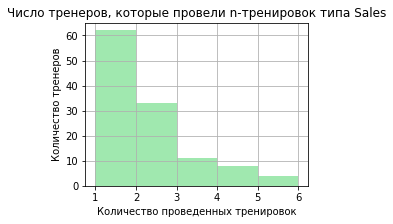

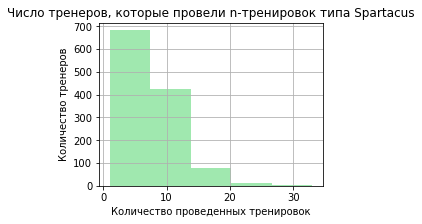

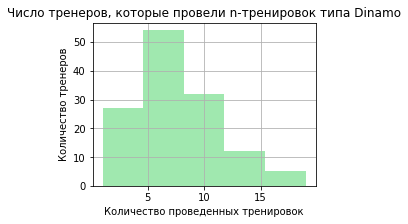

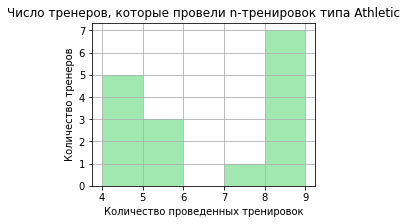

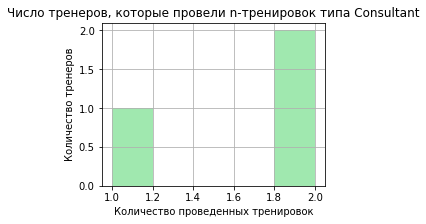

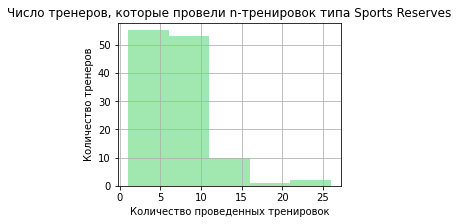

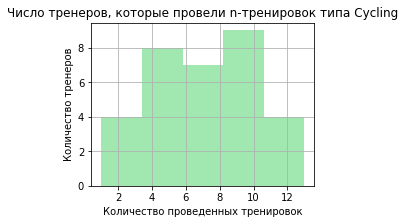

In [20]:
# Фильтрую по trainer_department тренировки нужного департамента

for trainer_department in departments:
    to_hist = workouts_by_trainer.loc[workouts_by_trainer['trainer_department'] == trainer_department]
    
    # отрисовываю гистограмму
    plt.figure(figsize=(4, 3)) # размер
    plt.grid()
    plt.hist(to_hist['workouts'], bins=5, color='#A0E8AF') #5 - количество бинов
    plt.title("Число тренеров, которые провели n-тренировок типа {}".format(trainer_department)) 
    plt.xlabel("Количество проведенных тренировок") 
    plt.ylabel('Количество тренеров')

    plt.show()

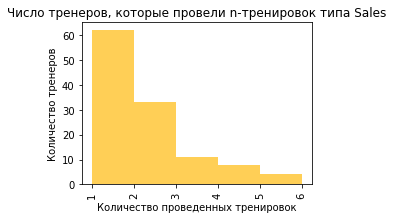

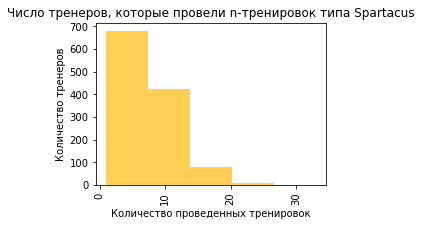

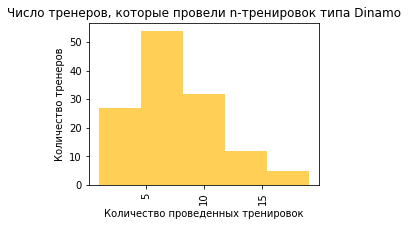

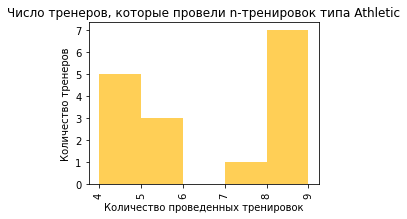

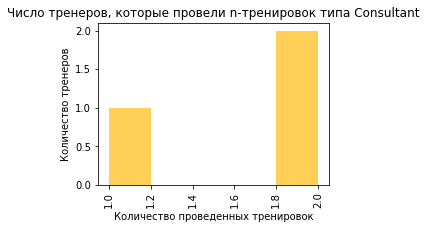

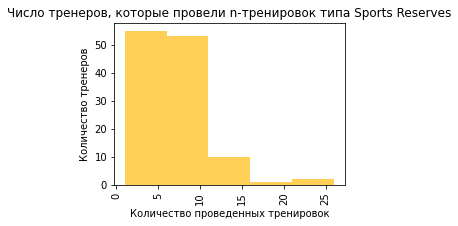

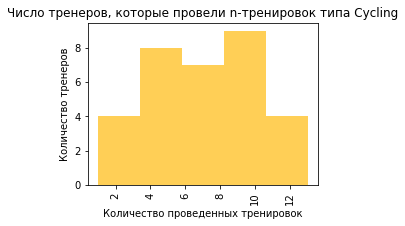

In [21]:
# Или 2 вариант

for trainer_department in departments:
    to_hist = workouts_by_trainer.loc[workouts_by_trainer['trainer_department'] == trainer_department]
    
    # отрисовываю гистограмму
    to_hist.hist(column='workouts', # колонка, по которой считаю количество
                 by='trainer_department', # столбец, по которой группирую
                 figsize=(4,3),
                 bins=5,
                 color='#FFCF56')
    plt.title("Число тренеров, которые провели n-тренировок типа {}".format(trainer_department)) 
    plt.xlabel("Количество проведенных тренировок") 
    plt.ylabel('Количество тренеров')

    plt.show() # не понятно - и без него работает, а зачем тогда нужен?

---

## Задание 3

Мы поняли, как тренировки распределились в каждом департаменте, но чтобы принимать какие-то решения, нужно посмотреть общую картину. Здесь нам поможет боксплот: увидим, в каких департаментах низкое среднее количество тренировок по сравнению с остальными и где больше перегруженных тренеров.

**Построй boxplot (один) с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам.**

Как это сделать:

1. В функцию, которая строит boxplot, передай аргументы: департаменты, общее количество проведенных тренерами занятий и количество тренировок у каждого тренера
2. Используй цвет
3. Оставь комментарий: какие рекомендации можно дать по распределению нагрузки на тренеров разных департаментов, глядя на этот график?

In [22]:
# Построю boxplot с распределением тренеров по количеству проведенных уроков с разбивкой по департаментам

def build_boxplot(departments, total_number_workouts, number_workouts_per_trainer):
 
    # отрисовываю график
    sns.boxplot(x=departments,
                y=total_number_workouts,
                data=number_workouts_per_trainer,
                palette='Set3', # устанавливаю пресет оттенков цветов
                dodge=False, # использую hue без изменения положения или ширины поля
                fliersize=5
               )  

In [23]:
# Формирую датасет: кол-во тренировок у каждого тренера (теперь не только за Ноябрь, а за весь период для всех тренеров)
number_workouts_per_trainer = workouts.groupby(['trainer_id','trainer_department'])['workout_id'].count() 

# перевожу series в dataframe, сбрасываю индекс
number_workouts_per_trainer = number_workouts_per_trainer.reset_index() 

# переименовываю столбец workout_id, ведь в нем теперь количество тренировок
number_workouts_per_trainer.columns = ['trainer_id','trainer_department','workouts'] 

number_workouts_per_trainer.head(2) # погляжу, что получилось

,trainer_id,trainer_department,workouts
0,1308,Spartacus,1
1,1994,Spartacus,187


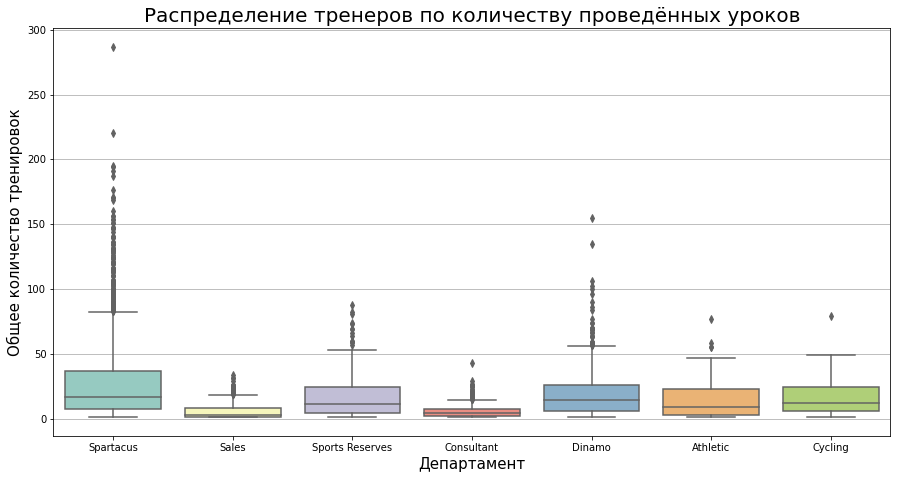

In [24]:
# Отрисовываю график через обращение к функции

df1 = number_workouts_per_trainer['trainer_department']
df2 = number_workouts_per_trainer['workouts']

plt.figure(figsize=(15, 7.5))  # задаю размер фигуры
plt.title('Распределение тренеров по количеству проведённых уроков', fontsize=20) # заголовок графика
plt.grid() # сетка

# отрисовываю Boxplot в функции
build_boxplot(df1, df2, number_workouts_per_trainer)

plt.ylabel('Общее количество тренировок', fontsize=15) # подписываю ось Y
plt.xlabel('Департамент', fontsize=15) # подписываю ось Y
plt.show()

<div class="alert alert-block alert-warning">

<b>Вывод 1:</b> 

Очень длинные выбросы - по департаментам Spartacus и Dinamo особенно. Можно очистить, ограничив общее количество тренировок значением 80
</div>

In [25]:
number_workouts_per_trainer['trainer_department']

0        Spartacus
1        Spartacus
2        Spartacus
3        Spartacus
4        Spartacus
           ...    
5395    Consultant
5396     Spartacus
5397    Consultant
5398         Sales
5399         Sales
Name: trainer_department, Length: 5400, dtype: object

In [26]:
# Очищу вбросы, ограничив общее количество тренировок значением 80
number_workouts_per_trainer = number_workouts_per_trainer.loc[number_workouts_per_trainer['workouts'] < 80]

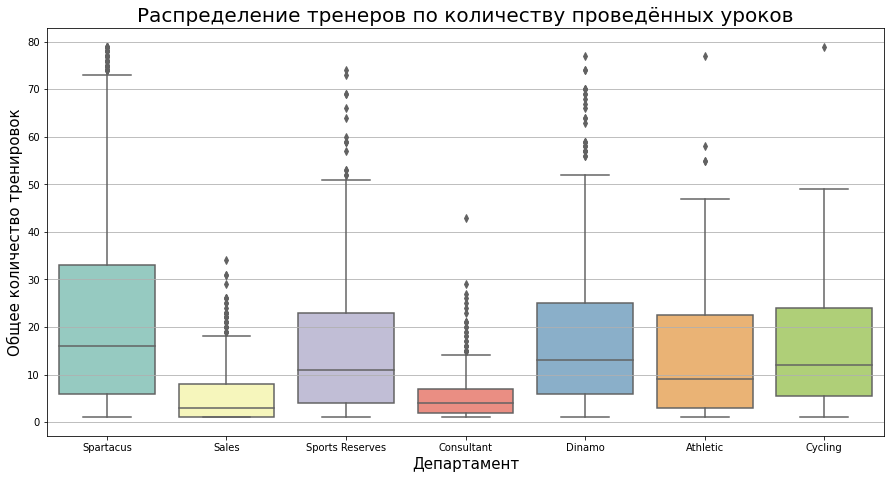

In [27]:
# Отрисовываю график заново

df1 = number_workouts_per_trainer['trainer_department']
df2 = number_workouts_per_trainer['workouts']

plt.figure(figsize=(15, 7.5))  # задаю размер фигуры
plt.title('Распределение тренеров по количеству проведённых уроков', fontsize=20) # заголовок графика
plt.grid() # сетка

# отрисовываю Boxplot в функции
build_boxplot(df1, df2, number_workouts_per_trainer)

plt.ylabel('Общее количество тренировок', fontsize=15) # подписываю ось Y
plt.xlabel('Департамент', fontsize=15) # подписываю ось Y
plt.show()

<div class="alert alert-block alert-warning">

<b>Вывод 2:</b>  
 
По всем департаментам медиана смещена в меньшу сторону - основная часть клиентов посещает мало тренировок, относительно некоторой (меньшей) части, посещающих тренировки часто.
</div>

---

## Задание 4


Логично, что дешевые тренировки пропускают чаще дорогих, но мы хотим сформировать стратегию по снижению количеству пропусков, а значит нам нужны более точные данные. Для начала мы хотим посмотреть детально на корреляцию нескольких параметров с вероятностью пропусков. Возможно, это позволит нам лучше сегментировать нашу аудиторию.

Есть гипотеза, что на вероятность прогула влияет не только цена, но и возраст. Изучи этот вопрос с помощью графиков. 

**Тебе предстоит построить 3 скаттерплота в этом задании. Оставь комментарий по каждому графику – видишь ли ты какие-то явные зависимости в данных?**

1. **Внимательно изучи код, который мы подготовили, и запусти ячейки.** Что мы сделали:
    - отфильтровали только платные тренировки
    - поменяли тип данных в числовых столбцах на `int`
    - разметили столбец со статусом, успешные тренировки пометили единицей, пропущенные - нулем, чтобы высчитать долю пропусков
    - создали датафрейм, где подсчитана доля прогулов по двум параметрам: возраст и цена


2. **Построй скаттерплот, который покажет корреляцию прогулов к цене**
    - используй группировку и создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без возраста, только с ценой
    - в функцию, которая строит скаттерплот можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике
    
Подготовим данные:

In [28]:
# отфильтрую бесплатные тренировки и сделаю копию датафрейма
cost_age_data = workouts_users[['status','cost','age']].loc[workouts_users.workout_schedule_type!='trial'].dropna().copy()

# изменяю тип данных столбцов age и cost на int. Это нужно, чтобы на подписях к диаграммам числа были целыми
cost_age_data['age'] = cost_age_data['age'].apply(int) 
cost_age_data['cost'] = cost_age_data['cost'].apply(int)

# кодирую столбец status, присваивая 1 в случаях, если он равен failed_by_client и 0 в случае success
cost_age_data['status'] = cost_age_data.status.map({'success':0,'failed_by_client':1})

# создаю агрегированные наборы данных
cost_age_data_agg = cost_age_data.groupby(['cost','age'])['status'].mean().reset_index() #считаю долю прогулов по возрасту и цене 

cost_age_data_agg

,cost,age,status
0,500,5,0.000000
1,500,6,0.500000
2,500,7,0.500000
3,500,8,0.242424
4,500,9,0.235294
...,...,...,...
185,1500,47,0.000000
186,1500,49,0.125000
187,1500,50,0.500000
188,1500,55,0.187500


In [29]:
# создаю агрегированные наборы данных и считаю долю прогулов по цене 
cost_data_agg = cost_age_data.groupby('cost')['status'].mean().reset_index()

cost_data_agg

,cost,status
0,500,0.254996
1,750,0.210409
2,1000,0.158010
3,1500,0.121612


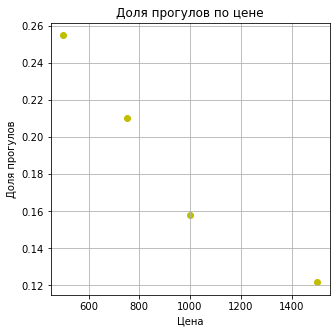

In [30]:
# Cтрою точечную диаграмму для прогулов по цене

plt.figure(figsize=(5, 5))  
plt.title('Доля прогулов по цене') 
plt.xlabel('Цена') 
plt.ylabel('Доля прогулов') 
plt.grid()

plt.scatter(
    cost_data_agg['cost'], # ось OX 
    cost_data_agg['status'], # ось OY
    color = 'y',
    )

plt.show()

<div class="alert alert-block alert-warning">

<b>Вывод:</b>   
    
Предсказуемо, при возрастании цены занятия доля пропусков снижается 
</div>

3. **Построй скаттерплот, который покажет корреляцию прогулов к возрасту**
    - используй группировку и создай датафрейм, где подсчитан процент прогулов аналогично предподготовленному датафрейму `cost_age_data_agg`, но без цен, только с возрастом
    - в функцию, которая строит скаттерплот, можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - задай цвет на графике

In [31]:
# создаю агрегированные наборы данных и считаю долю прогулов по возрасту 
age_data_agg = cost_age_data.groupby('age')['status'].mean().reset_index()

age_data_agg.head(2)

,age,status
0,4,0.255814
1,5,0.500000


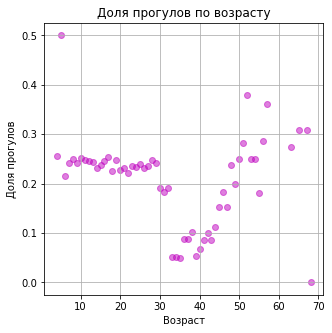

In [32]:
# Cтрою точечную диаграмму для прогулов по возрасту

plt.figure(figsize=(5, 5))  
plt.title('Доля прогулов по возрасту') 
plt.xlabel('Возраст') 
plt.ylabel('Доля прогулов') 
plt.grid()

plt.scatter(
    age_data_agg['age'], # ось OX 
    age_data_agg['status'], # ось OY
    alpha = 0.5, # прозрачность 50%
    color = 'm',
    )

plt.show()

<div class="alert alert-block alert-warning">

<b>Вывод:</b>   
    
Вижу две группы корреляций  
- в первой, с возрастом до 30 лет, доля пропусков почти постоянна
- во второй, к 30 годам доля резко снижается и имеет минимум в 30..40 лет, потом начинает резко расти, вплоть до 50--60 лет.
</div>

4. **Построй скаттерплот, который покажет корреляцию прогулов и к возрасту, и к цене одновременно**
    - создай словарь цветов и цен в переменной `price_color`. Чтобы увидеть все уникальные значения, можно использовать множества
    - в функцию, которая строит скаттерплот, можешь добавить любые аргументы, но обязательно используй вот эти:
        - размер графика
        - название графика
        - подпись оси `X`
        
        - подпись оси `Y`
        - аргумент  `с` - цвета для разных цен
          

Задаю цвет в виде словаря, где ключ — цена (cost), а значение — кодовая буква цвета.

<img style='float:left' src=https://res.cloudinary.com/djcwxgbfz/image/upload/v1608375631/skills/color.jpg width="800" >

In [33]:
# Смотрю уникальные значения цен - 'cost'

set(cost_age_data_agg['cost'])

{500, 750, 1000, 1500}

In [34]:
# Строю цветовую карту

price_color = {500: 'b',
               750: 'g',
               1000: 'y',
               1500: 'r'}

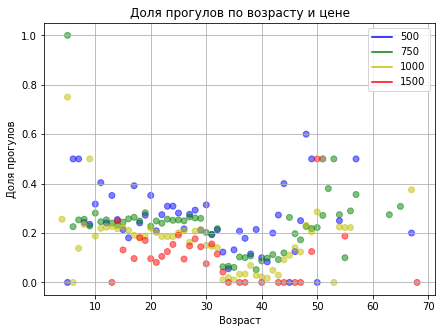

In [35]:
# Cтрою точечную диаграмму для прогулов по возрасту и по цене

plt.figure(figsize=(7, 5))  
plt.title('Доля прогулов по возрасту и цене') 
plt.xlabel('Возраст') 
plt.ylabel('Доля прогулов') 
plt.grid()


# отрисовываю диаграмму
plt.scatter(
    cost_age_data_agg['age'], # ось OX 
    cost_age_data_agg['status'], # ось OY
    alpha = 0.5, # прозрачность 50%
    c = cost_age_data_agg['cost'].map(price_color) # задаю цвета точек
    )


markers = [plt.Line2D([0,0], [0,0], color=color) for color in price_color.values()] # линии в нужный цвет
plt.legend(markers, price_color.keys())
plt.show()

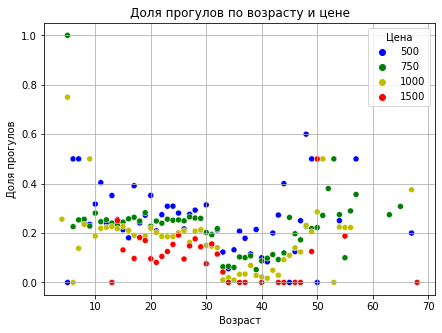

In [36]:
# Вариант 2, предложенный наставником, через библиотеку seaborn

# начало, как в варианте 1
plt.figure(figsize=(7, 5))  
plt.title('Доля прогулов по возрасту и цене') 
plt.xlabel('Возраст') 
plt.ylabel('Доля прогулов') 
plt.grid()


# отрисовываю диаграмму
sns.scatterplot(data=cost_age_data_agg, # источник данных
                x='age', # ось OX
                y='status', # ось OY
                hue='cost', # дополнительный срез - в цвете
                palette=price_color
               )

plt.legend(title='Цена')
plt.show()

<div class="alert alert-block alert-warning">

<b>Вывод:</b>   
    
Для более дорогих тренировок более низкая доля прогулов.  
Возрастная группа до 30 лет, тем не менее, не столь сильно придерживается этой зависимости.
</div>

---

## Задание 5

**Сделай heatmаp для кейса из задания 4.** 

1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделали:
    - написали функцию, которая в зависимости от возраста возвращает возрастную группу
    - создали новый столбец, применив функцию к столбцу возраста
    - сгруппировали данные, чтобы для каждой пары возраст-цена была сгруппирована средняя вероятность прогула
    
    
2. Создай сводную таблицу (матрицу), в которой строками будут интервалы возраста, столбцами — цена занятия, значением — доля прогулов.
3. Построй heatmap. Используй любые аргументы, но обязательно добавь вот эти:
    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - вывод значений в ячейках
    
4. Оставь комментарий: какие закономерности ты видишь на графике?

In [37]:
# Функция, которая разбивает клиентов на возрастные группы

def calculate_age_bins(age):
    if age <= 20:
        return '0-20'
    if age <= 25:
        return '21-25'
    if age <= 30:
        return '26-30'
    if age <= 35:
        return '31-35'
    if age <= 40:
        return '36-40'
    if age <= 45:
        return '41-45'
    if age <= 50:
        return '46-50'
    return '50+'

In [38]:
# кладу в новый столбец возрастную группу
cost_age_data['age_bin'] = cost_age_data.age.apply(calculate_age_bins)

# создаю агрегированный набор данных
cost_age_data_agg = cost_age_data.groupby(['cost','age_bin'])['status'].mean().reset_index()
cost_age_data_agg.head(4)

,cost,age_bin,status
0,500,0-20,0.286578
1,500,21-25,0.283505
2,500,26-30,0.255597
3,500,31-35,0.165217


In [39]:
# Создаю матрицу, где строки - возраст, столбцы — цена занятия, значения — доля прогулов.

heatmap_skipping_workout = cost_age_data_agg.pivot(
    index='age_bin', 
    columns='cost', 
    values='status')

heatmap_skipping_workout

cost,500,750,1000,1500
age_bin,,,,
0-20,0.286578,0.249445,0.206955,0.133663
21-25,0.283505,0.250124,0.190771,0.158784
26-30,0.255597,0.249445,0.191932,0.124706
31-35,0.165217,0.128114,0.069580,0.100313
36-40,0.175573,0.097115,0.035191,0.000000
41-45,0.191489,0.109646,0.067100,0.000000
46-50,0.285714,0.198748,0.171171,0.097561
50+,0.307692,0.296992,0.239130,0.176471


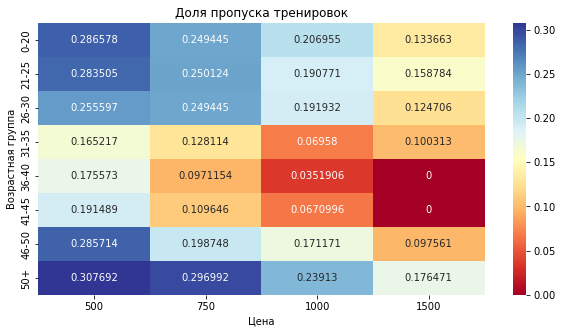

In [40]:
# Строю тепловую карту

plt.figure(figsize=(10,5))
sns.heatmap(heatmap_skipping_workout, 
            annot=True, # карта со значениями
            cmap='RdYlBu', # цветовая палитра
            fmt='g' # формат чисел без дробной части
           )
plt.title("Доля пропуска тренировок")
plt.ylabel("Возрастная группа")
plt.xlabel("Цена")
plt.show()

<div class="alert alert-block alert-warning">

<b>Вывод:</b>   
    
Для более дорогих тренировок более низкая доля прогулов.   
Вижу тёплый цветовой клин для возрастной группа 31-35 (особенно).. 36-40 ... 41-45, говорящий, что эта группа менее подвержена такой зависимости.
</div>

---

## EXTRA

Если остались силы, сделай дополнительное задание по желанию. Основная его сложность в том, что нужно построить bar chart, а на занятии функцию этого графика мы не проходили. Но найти информацию самостоятельно будет совсем не сложно. 

**Чтобы углубиться в данные, построй bar chart количества тренировок по дням недели (с понедельника по воскресенье) и отобрази горизонтальной линией на графике среднее количество тренировок  в день.**

Как это сделать:
1. Внимательно изучи код, который мы подготовили, и запусти ячейки. Что мы сделалали:
    - вернули индекс внутри датафрейма
    - переименовали столбцы, чтобы они соответствовали содержимому
    - добавили столбец с номером дня недели с помощью `dt.weekday`
    
    - добавили столбец с названием дня недели с помощью `dt.day_name()`
    

2. Cгруппируй данные колонки `week_day_num` по `workouts` с подсчетом среднего.
3. Построй bar chart. Можешь добавить любые агрументы, но обязательно используй вот эти:

    - размер графика
    - название графика
    - подпись оси `X`
    
    - подпись оси `Y`
    - задай цвет на графике
    

4. Добавь горизонтальную линию, параллельную оси `X`, со значением `y` равным средним количеством тренировок в день. Если не помнишь, как это делать, смело смотри шпаргалку – там ты найдешь все детали.
5. Если еще осталось желание исследовать новое, можешь добавить на график название дней недели, задав их с помощью метода `plt.xticks`, его ты легко найдешь в документации. 
6. Оставь комментарий: что ты видишь на графике? 

**Подготовим данные**

In [41]:
trainings_by_day # смотрю, в каком формате лежат нужные данные

start_at
2020-01-01      1
2020-01-02      4
2020-01-03      5
2020-01-04      5
2020-01-05      9
             ... 
2020-12-04    365
2020-12-05    292
2020-12-06    250
2020-12-07    451
2020-12-08      3
Freq: D, Name: workout_id, Length: 343, dtype: int64

In [42]:
trainings_by_day_frame = trainings_by_day.reset_index() # сбрасываю индекс
trainings_by_day_frame.columns=['workouts_date', 'workouts'] # переименовываю столбцы, чтобы названия соответствовали содержимому
trainings_by_day_frame['week_day_num'] = trainings_by_day_frame['workouts_date'].dt.weekday # добавляю номер дня недели
trainings_by_day_frame['week_day_name'] = trainings_by_day_frame['workouts_date'].dt.day_name() # добавляю название дня недели
trainings_by_day_frame

,workouts_date,workouts,week_day_num,week_day_name
0,2020-01-01,1,2,Wednesday
1,2020-01-02,4,3,Thursday
2,2020-01-03,5,4,Friday
3,2020-01-04,5,5,Saturday
4,2020-01-05,9,6,Sunday
...,...,...,...,...
338,2020-12-04,365,4,Friday
339,2020-12-05,292,5,Saturday
340,2020-12-06,250,6,Sunday
341,2020-12-07,451,0,Monday


Мы видим, что нумерация начинается с 0 до 6. Чтобы дни недели выглядели привычнее, добавим к номеру дня 1.

In [43]:
trainings_by_day_frame['week_day_num'] += 1 
trainings_by_day_frame

,workouts_date,workouts,week_day_num,week_day_name
0,2020-01-01,1,3,Wednesday
1,2020-01-02,4,4,Thursday
2,2020-01-03,5,5,Friday
3,2020-01-04,5,6,Saturday
4,2020-01-05,9,7,Sunday
...,...,...,...,...
338,2020-12-04,365,5,Friday
339,2020-12-05,292,6,Saturday
340,2020-12-06,250,7,Sunday
341,2020-12-07,451,1,Monday


In [44]:
# Cгруппирую колонки workouts по week_day_num с подсчетом среднего

trainings_by_day_frame_agg = trainings_by_day_frame.groupby('week_day_num')['workouts'].mean().reset_index()
trainings_by_day_frame_agg

,week_day_num,workouts
0,1,366.387755
1,2,349.673469
2,3,332.857143
3,4,365.244898
4,5,304.326531
5,6,227.959184
6,7,190.142857


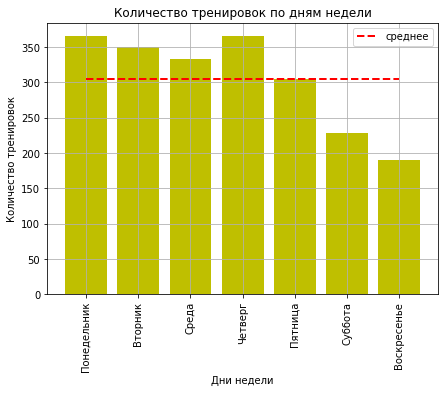

In [45]:
# Строю столбчатую диаграмму - bar chart
plt.figure(figsize=(7, 5))  
plt.title('Количество тренировок по дням недели') 
plt.xlabel('Дни недели') 
plt.ylabel('Количество тренировок') 
plt.grid()

# отрисовываю bar chart
plt.bar(
    trainings_by_day_frame_agg['week_day_num'], # ось OX 
    trainings_by_day_frame_agg['workouts'], # ось OY
    color = 'y'
    )

# отрисовываю среднее пунктирной красной линией толщиной 2
# plt.axhline(trainings_by_day_frame_agg['workouts'].mean(), # axhline : horizontal line across the Axes
#             xmin=0.1,
#             xmax=0.9,
#             color='r', # цвет линии
#             linestyle='--', # тип линии
#             linewidth=2, # толщина линии
#             label = 'среднее') # значение легенды

# другой, но похожий метод вывода линии
plt.hlines(trainings_by_day_frame_agg['workouts'].mean(),
            1,7,
            color='r', # цвет линии
            linestyle='--', # тип линии
            linewidth=2, # толщина линии
            label = 'среднее') # значение легенды

# переобределяю обозначения по оси OX
plt.xticks(
    [1,2,3,4,5,6,7],
    ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'],
    rotation='vertical'
    )

plt.legend() # вывожу легенду
plt.show()

<div class="alert alert-block alert-warning">

<b>Вывод:</b>   
    
- Выходные дни - аутсайдеры, по количеству желающих тренироваться.
- Четверг и Понедельник - лидеры
 </div>  